# Fifa 19
Dataset used: [Fifa 19 dataset](https://www.kaggle.com/karangadiya/fifa19)

Target Variable:
- Wage: integer, in thousand €, not null



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
import datetime

In [2]:
# Read data from file
df = pd.read_csv("../data/fifa/fifa19_df_cleaned.csv")
df_small1 = pd.read_csv("../data/fifa/fifa19_dfsmall1_cleaned.csv")
df_small2 = pd.read_csv("../data/fifa/fifa19_dfsmall2_cleaned.csv")
pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 500)
df.head()


,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,foot_left,foot_right,nationality_afghanistan,nationality_albania,nationality_algeria,nationality_andorra,nationality_angola,nationality_antigua & barbuda,nationality_argentina,nationality_armenia,nationality_australia,nationality_austria,nationality_azerbaijan,nationality_barbados,nationality_belarus,nationality_belgium,nationality_belize,nationality_benin,nationality_bermuda,nationality_bolivia,nationality_bosnia herzegovina,nationality_botswana,nationality_brazil,nationality_bulgaria,nationality_burkina faso,nationality_burundi,nationality_cameroon,nationality_canada,nationality_cape verde,nationality_central african rep.,nationality_chad,nationality_chile,nationality_china pr,nationality_colombia,nationality_comoros,nationality_congo,nationality_costa rica,nationality_croatia,nationality_cuba,nationality_curacao,nationality_cyprus,nationality_czech republic,nationality_denmark,nationality_dominican republic,nationality_dr congo,nationality_ecuador,nationality_egypt,nationality_el salvador,nationality_england,nationality_equatorial guinea,nationality_eritrea,nationality_estonia,nationality_ethiopia,nationality_faroe islands,nationality_fiji,nationality_finland,nationality_france,nationality_fyr macedonia,nationality_gabon,nationality_gambia,nationality_georgia,nationality_germany,nationality_ghana,nationality_greece,nationality_grenada,nationality_guam,nationality_guatemala,nationality_guinea,nationality_guinea bissau,nationality_guyana,nationality_haiti,nationality_honduras,nationality_hong kong,nationality_hungary,nationality_iceland,nationality_indonesia,nationality_iran,nationality_iraq,nationality_israel,nationality_italy,nationality_ivory coast,nationality_jamaica,nationality_japan,nationality_jordan,nationality_kazakhstan,nationality_kenya,nationality_korea dpr,nationality_korea republic,nationality_kosovo,nationality_kuwait,nationality_latvia,nationality_lebanon,nationality_liberia,nationality_libya,nationality_liechtenstein,nationality_lithuania,nationality_luxembourg,nationality_madagascar,nationality_mali,nationality_mauritania,nationality_mauritius,nationality_mexico,nationality_moldova,nationality_montenegro,nationality_montserrat,nationality_morocco,nationality_mozambique,nationality_namibia,nationality_netherlands,nationality_new caledonia,nationality_new zealand,nationality_nicaragua,nationality_niger,nationality_nigeria,nationality_northern ireland,nationality_norway,nationality_palestine,nationality_panama,nationality_paraguay,nationality_peru,nationality_philippines,nationality_poland,nationality_portugal,nationality_puerto rico,nationality_qatar,nationality_republic of ireland,nationality_romania,nationality_russia,nationality_rwanda,nationality_saudi arabia,nationality_scotland,nationality_senegal,nationality_serbia,nationality_sierra leone,nationality_slovakia,nationality_slovenia,nationality_south africa,nationality_south sudan,nationality_spain,nationality_st kitts nevis,nationality_sudan,nationality_suriname,nationality_sweden,nationality_switzerland,nationality_syria,nationality_são tomé & príncipe,nationality_tanzania,nationality_thailand,nationality_togo,nationality_trinidad & tobago,nationality_tunisia,nationality_turkey,nationality_uganda,nationality_ukraine,nationality_united arab emirates,nationality_united states,nationality_uruguay,nationality_uzbekistan,nationality_venezuela,nationality_wales,nationality_zambi

# Modeling:
Regressionstechniken: Linear, Polynomial, knn, Regression Trees

In [3]:
# reduce dataframe to subset to make manageable for polynomial regression
df_small1 = df_small1.sample(n = 5000)
df_small1.shape
df_small2 = df_small2.sample(n = 500)
df_small2.shape


(500, 926)

In [4]:
def print_scores(model, x_train, y_train):
    r_sq = model.score(x_train, y_train)
    b0 = model.intercept_
    b1 = model.coef_
    print("r_sq, coefficient of determination: ")
    print(r_sq)
    print("b0, intercept: ")
    print(b0)
    print("b1, slope: ")
    print(b1)
    
    print("y_pred = model.intercept_ + model.coef_ * x")

In [18]:
# Metrics
def print_metrics(y_test, y_pred):
    results = pd.DataFrame(list(zip(y_test, y_pred)), 
                   columns =['Wage_test', 'Wage_prediction']) 
    
    accuracy = results["Wage_test"] - results["Wage_prediction"]
    accuracy = np.square(accuracy)
    accuracy = np.sqrt(accuracy)
    
    print("# compare test and prediction")
    print(results)
    
    print("# bad predictions (over 100 difference)")
    print(results[(results["Wage_test"] - results["Wage_prediction"]) > 100])
    
    print("# span of data")
    span = results["Wage_test"].max() - results["Wage_test"].min()
    print(span)
    
    print("# median accuracy")
    median = np.median(accuracy) 
    print(median)
    
    print("# percent deviation")
    percent = median / span * 100
    percent_str = "{:.4f}".format(percent)
    percent_str = percent_str + " %"
    print(percent_str)
    return results

In [6]:
# Scores
def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)

In [7]:
def print_scatterplot(y_test, y_pred):
    # Plot outputs
    plt.scatter(y_test, y_pred)
    
    plt.xlabel("Wage_test")
    plt.ylabel("Wage_prediction")
    
    plt.xlim(-1, 500)
    plt.ylim(-1, 500)
    
    # plt.xticks(())
    # plt.yticks(())
    
    plt.show()


In [8]:
######### Linear Regression #########
def linear_reg(dataset):
    # Train & Test
    train, test = train_test_split(dataset, test_size=0.2)
    
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    r_sq = model.score(x_train, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(x_test)
    
    return([y_test, y_pred])

######### Polynomial Regression #########
def polynomial_reg(dataset):
    train, test = train_test_split(dataset, test_size=0.2)
        
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    poly_features = PolynomialFeatures(degree=2)
    x_train_poly = poly_features.fit_transform(x_train)
    
    print(x_train_poly.shape)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(poly_features.fit_transform(x_test))
    
    return([y_test, y_pred])

######### knn Regression #########
def knn_reg(dataset, k_neighbors):
    train, test = train_test_split(dataset, test_size=0.2)
    #k_neighbors = 50
    
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    model = neighbors.KNeighborsRegressor(k_neighbors)
    model.fit(x_train, y_train)
    
    r_sq = model.score(x_train, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(x_test)
    
    return([y_test, y_pred])

######### Regression Trees #########
def reg_tree(dataset):
    train, test = train_test_split(dataset, test_size=0.2)
    
    # Training Model
    x_train = train.drop('Wage', axis=1)
    y_train = train['Wage']
    
    model = DecisionTreeRegressor(random_state=0)
    model.fit(x_train, y_train)
    
    r_sq = model.score(x_train, y_train)
    
    # Testing
    x_test = test.drop('Wage', axis=1)
    y_test = test['Wage']
    y_pred = model.predict(x_test)
    
    return([y_test, y_pred])


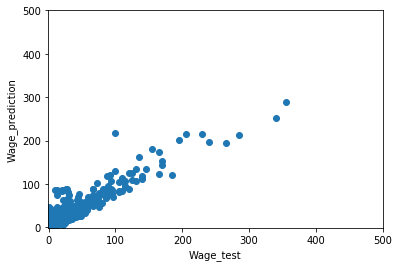

MSE:  5064627.238721672
RMSE:  2250.4726700677065
R2:  -826635.9653991237
# compare test and prediction
      Wage_test  Wage_prediction
0             1         2.583716
1            35        47.252282
2             4         4.839181
3             4         3.808458
4            29        22.506979
...         ...              ...
2946          2         2.377000
2947          3         3.013256
2948          3         1.031646
2949         10        13.247316
2950          1        -0.746906

[2951 rows x 2 columns]
# bad predictions (over 100 difference)
      Wage_test  Wage_prediction
1323          1    -95000.638528
1353          1    -49135.599402
2217        565       389.465073
2645          1    -26804.596525
# span of data
564
# median accuracy
1.9968215177650563
# percent deviation
0.3540 %


,Wage_test,Wage_prediction
0,1,2.583716
1,35,47.252282
2,4,4.839181
3,4,3.808458
4,29,22.506979
...,...,...
2946,2,2.377000
2947,3,3.013256
2948,3,1.031646
2949,10,13.247316


In [19]:
linear = linear_reg(df)
print_scatterplot(linear[0], linear[1])
print_performance(linear[0], linear[1])
print_metrics(linear[0], linear[1])
# print_scores(model, linear[0], linear[1])

(4000, 4753)


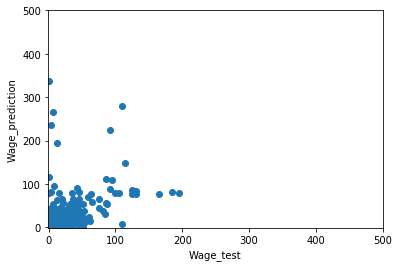

MSE:  1289614.9128450034
RMSE:  1135.612131339307
R2:  -348184.04045730474
# compare test and prediction
     Wage_test  Wage_prediction
0            4       -12.764037
1            1         7.642618
2            2         1.006159
3            1        11.778248
4           28        15.139811
..         ...              ...
995          5         5.883478
996          5       -10.354010
997         12        10.522662
998          3         1.177042
999         88        55.021616

[1000 rows x 2 columns]
# span of data
194
# median accuracy
7.326090230082627
# percent deviation
3.7763 %


In [10]:
polynomial = polynomial_reg(df_small1)
print_scatterplot(polynomial[0], polynomial[1])
print_performance(polynomial[0], polynomial[1])
print_metrics(polynomial[0], polynomial[1])
# print_scores(model, polynomial[0], polynomial[1])


(400, 429201)


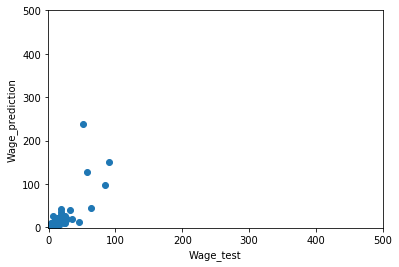

MSE:  486.52295167655916
RMSE:  22.057265281003428
R2:  -82.91086051141166
# compare test and prediction
    Wage_test  Wage_prediction
0           5         7.895159
1           2         6.297056
2           5         9.309613
3           1        -1.390201
4           1        -0.810169
..        ...              ...
95          3         3.058273
96          4         3.707793
97          1         5.151461
98          1         0.760045
99          2         5.851663

[100 rows x 2 columns]
# span of data
90
# median accuracy
2.344504519410833
# percent deviation
2.6050 %


In [11]:
polynomial = polynomial_reg(df_small2)
print_scatterplot(polynomial[0], polynomial[1])
print_performance(polynomial[0], polynomial[1])
print_metrics(polynomial[0], polynomial[1])
# print_scores(model, polynomial[0], polynomial[1])


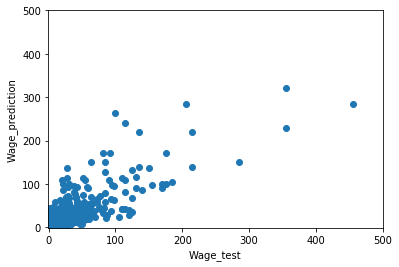

MSE:  161.01866485936972
RMSE:  12.689313017629036
R2:  68.4568488511204
# compare test and prediction
      Wage_test  Wage_prediction
0             1              1.0
1             3              3.0
2           120             28.4
3            82            171.0
4             4              5.6
...         ...              ...
2946          1              3.6
2947          1              2.0
2948          1              1.4
2949          1              2.0
2950          1              1.0

[2951 rows x 2 columns]
# bad predictions (over 100 difference)
      Wage_test  Wage_prediction
1873        285            150.0
2197        455            285.0
2586        355            229.0
# span of data
454
# median accuracy
1.5999999999999996
# percent deviation
0.3524 %


,Wage_test,Wage_prediction
0,1,1.0
1,3,3.0
2,120,28.4
3,82,171.0
4,4,5.6
...,...,...
2946,1,3.6
2947,1,2.0
2948,1,1.4
2949,1,2.0


In [20]:
knn = knn_reg(df, 5)
print_scatterplot(knn[0], knn[1])
print_performance(knn[0], knn[1])
print_metrics(knn[0], knn[1])
# print_scores(model, knn[0], knn[1])


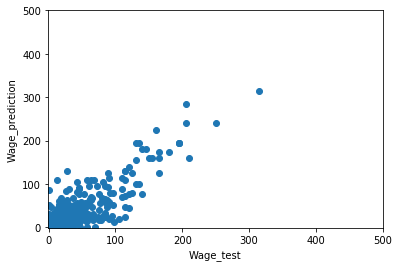

MSE:  115.23957980345645
RMSE:  10.734969948884647
R2:  75.28493060394284
# compare test and prediction
      Wage_test  Wage_prediction
0             1              1.0
1             1              1.0
2             2              1.0
3            14             22.0
4             1              2.0
...         ...              ...
2946          5              4.0
2947          1              1.0
2948         15              4.0
2949          2              1.0
2950          1              1.0

[2951 rows x 2 columns]
# bad predictions (over 100 difference)
Empty DataFrame
Columns: [Wage_test, Wage_prediction]
Index: []
# span of data
314
# median accuracy
1.0
# percent deviation
0.3185 %


,Wage_test,Wage_prediction
0,1,1.0
1,1,1.0
2,2,1.0
3,14,22.0
4,1,2.0
...,...,...
2946,5,4.0
2947,1,1.0
2948,15,4.0
2949,2,1.0


In [23]:
reg = reg_tree(df)
print_scatterplot(reg[0], reg[1])
print_performance(reg[0], reg[1])
print_metrics(reg[0], reg[1])
# print_scores(model, reg[0], reg[1])
